# Head Size - Brain Weight Project

Problem Statement:

The size of the brain is a frequent topic of study within the fields of anatomy, biological anthropology, animal science and evolution. Brain size is sometimes measured by weight and sometimes by volume (via MRI scans or by skull volume). 

Regarding "intelligence testing", a question that has been frequently investigated is the relation of brain size to intelligence. There are many ways to assess a person's intelligence. But Ed Klaber of Chelmsford, England, came up with one of his own. He wants to know if people with bigger heads have bigger brains. It is said that measuring the size of the head does give some indication of how big the brain is. 

Even though head size also depends on factors such as the muscularity of the head and thickness of the bone, it's very likely that a bigger head means a bigger brain. Thus, it seems that head size and the brain weight are very much related to each other in scientific terms. In this demonstration, we will try to prove this using machine learning. 

Generally, the Head size of humans gives impressions of the weight of brain. Thus, here we will try to predict the "Brain Weight" of the person using the "Head Size".

Below, you can find the dataset for this use case. The Head Brain file consist of four attributes (Gender, Age, Headsize, Brainweight) .

You have to train the machine for learning the size of head and the corresponding brain weight. Then, after learning/training, it should be able to predict the brain weight given on certain head size. 

Make sure to follow the steps mentioned below: 

Complete the Exploratory Data Analysis(EDA).

Understand the type of the problem and apply the appropriate model for its training and testing phase.

Dataset:  https://github.com/dsrscientist/dataset1/blob/master/headbrain.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Headbrain.csv')

In [3]:
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
df.nunique()

Gender           2
AgeRange         2
HeadSize       221
BrainWeight    146
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

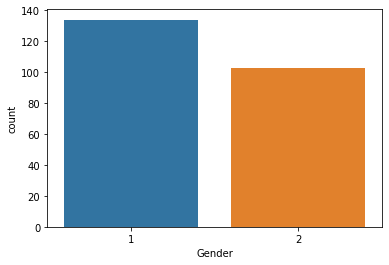

In [6]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='HeadSize'>

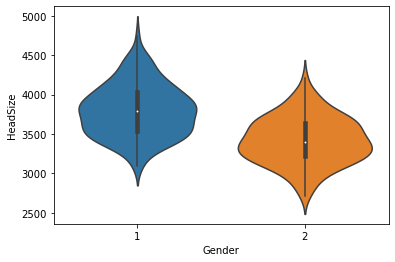

In [7]:
sns.violinplot(data = df, x = 'Gender', y = 'HeadSize')

<AxesSubplot:xlabel='Gender', ylabel='BrainWeight'>

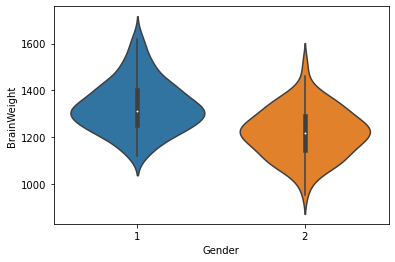

In [8]:
sns.violinplot(data = df, x = 'Gender', y = 'BrainWeight')

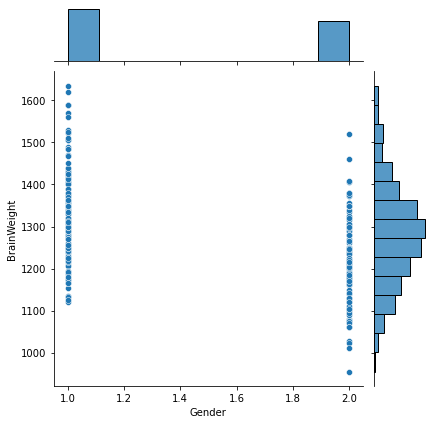

In [9]:
sns.jointplot(data = df, x = 'Gender', y = 'BrainWeight')

<AxesSubplot:xlabel='AgeRange', ylabel='count'>

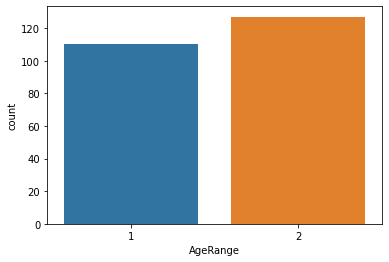

In [10]:
sns.countplot(df['AgeRange'])

<AxesSubplot:xlabel='AgeRange', ylabel='HeadSize'>

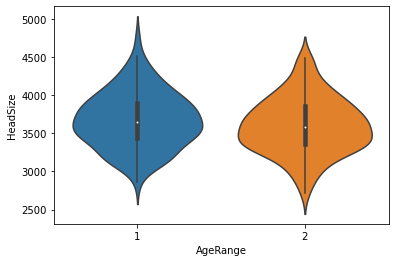

In [11]:
sns.violinplot(data = df, x = 'AgeRange', y = 'HeadSize')

<AxesSubplot:xlabel='AgeRange', ylabel='BrainWeight'>

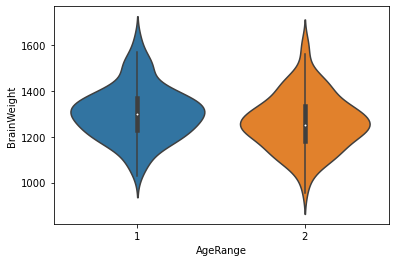

In [12]:
sns.violinplot(data = df, x = 'AgeRange', y = 'BrainWeight')

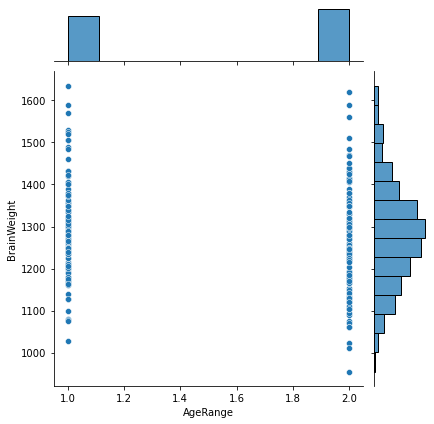

In [13]:
sns.jointplot(data = df, x = 'AgeRange', y = 'BrainWeight')

<AxesSubplot:xlabel='HeadSize', ylabel='BrainWeight'>

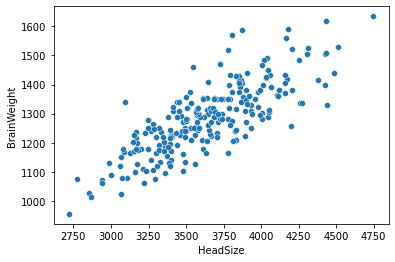

In [14]:
sns.scatterplot(data = df, x ='HeadSize', y = 'BrainWeight')

In [15]:
df.corr()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


<AxesSubplot:>

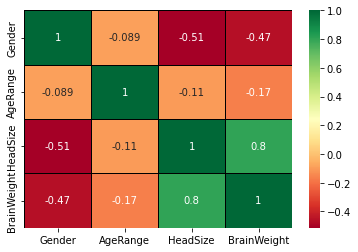

In [16]:
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'Black', cmap = 'RdYlGn')

Gender            AxesSubplot(0.125,0.125;0.168478x0.755)
AgeRange       AxesSubplot(0.327174,0.125;0.168478x0.755)
HeadSize       AxesSubplot(0.529348,0.125;0.168478x0.755)
BrainWeight    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

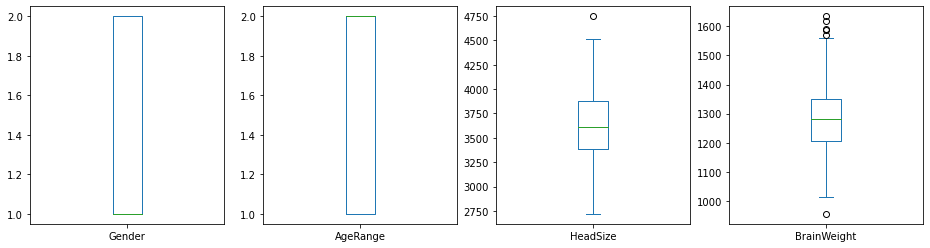

In [17]:
df.plot(kind = 'box', subplots = True, layout = (1,4), figsize = (16,4))

In [18]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(237, 4)

In [19]:
np.where(z<3)

(array([  0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   2,   2,   3,
          3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,   6,   6,
          6,   6,   7,   7,   7,   7,   8,   8,   8,   8,   9,   9,   9,
          9,  10,  10,  10,  10,  11,  11,  11,  11,  12,  12,  12,  12,
         13,  13,  13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,
         16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  18,  19,  19,
         19,  19,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,
         22,  23,  23,  23,  23,  24,  24,  24,  25,  25,  25,  25,  26,
         26,  26,  26,  27,  27,  27,  27,  28,  28,  28,  28,  29,  29,
         29,  29,  30,  30,  30,  30,  31,  31,  31,  31,  32,  32,  32,
         32,  33,  33,  33,  33,  34,  34,  34,  34,  35,  35,  35,  35,
         36,  36,  36,  36,  37,  37,  37,  37,  38,  38,  38,  38,  39,
         39,  39,  39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,
         42,  42,  43,  43,  43,  43,  44,  44,  44

In [20]:
df1 = df[(z<3).all(axis=1)]
df.shape, df1.shape

((237, 4), (236, 4))

In [21]:
df.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

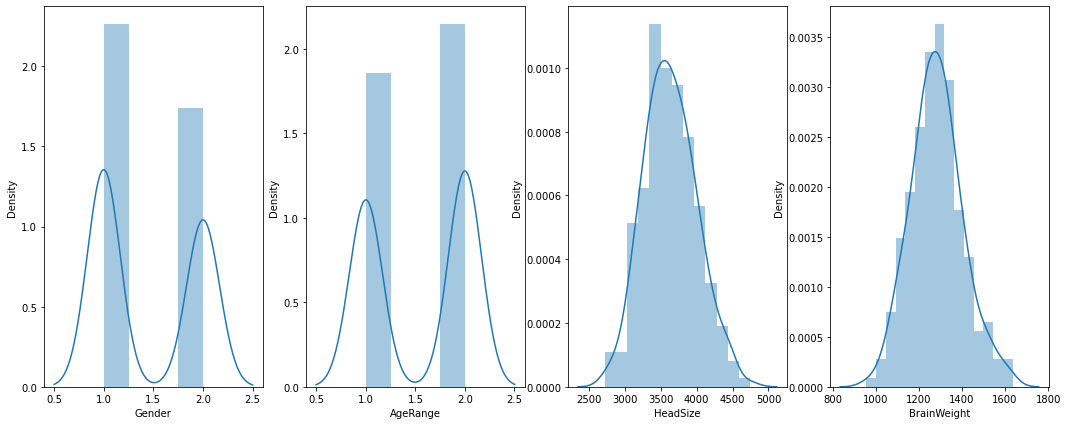

In [22]:
plt.figure(figsize=(18,7))
for i, column in enumerate(df.columns, 1):
    plt.subplot(1,4,i)
    sns.distplot(df[column])

In [23]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [24]:
X = df1.drop(['BrainWeight'], axis = 1)
Y = df1['BrainWeight']

# Train Test Split

In [25]:
X = pd.DataFrame(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=10)
cvs.mean()

MAE: 60.528596074399964
MSE: 5473.805134851117
RMSE: 73.98516834373709
r2score: 0.5517413115744907


0.4586062102918622

In [28]:
#DecisionTree Regressor model

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(dtr, X, Y, cv=10)
cvs.mean()

MAE: 67.77083333333333
MSE: 8437.354166666666
RMSE: 91.85507153481873
r2score: 0.3090515246055838


-0.17326454901418162

In [29]:
#RandomForest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(rf, X, Y, cv=10)
cvs.mean()

MAE: 61.64263392857142
MSE: 6133.226371784081
RMSE: 78.3149179389475
r2score: 0.4977402480537051


0.24544110886249695

In [30]:
#Support Vector Regressor model

from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,Y_train)
pred=svr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(svr, X, Y, cv=10)
cvs.mean()

MAE: 90.26484224933178
MSE: 12105.805006730867
RMSE: 110.02638323025468
r2score: 0.0086361971305835


-0.41500012517819573

In [31]:
# KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv=10)
cvs.mean()

MAE: 58.989583333333336
MSE: 6104.1328125
RMSE: 78.12894990014905
r2score: 0.5001227663211675


0.33206001364245086

In [32]:
#GBRegressor

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
pred = gbr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(gbr, X, Y, cv=10)
cvs.mean()

MAE: 58.74555727848631
MSE: 5493.06831996002
RMSE: 74.11523675979197
r2score: 0.5501638184268378


0.2795992900119139

# HyperParameter Tuning 

# Ridge 

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [34]:
ridge = Ridge()
param_grid = {'alpha':[0.001, 0.1, 1,3,6,9,11,16,26,55,80,93,]} #it has only 1 parameter "alpha"

ridgecv = GridSearchCV(ridge, param_grid, scoring ='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.1, 1, 3, 6, 9, 11, 16, 26, 55, 80,
                                   93]},
             scoring='neg_mean_squared_error')

In [35]:
ridgecv.best_params_

{'alpha': 16}

In [36]:
ridgecv.best_score_

-5024.180007226179

In [37]:
ridgecv.predict(X_test)
pred = ridgecv.predict(X_test)

In [38]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(ridge, X, Y, cv=None)
cvs.mean()

MAE: 60.82109128874151
MSE: 5583.060245402089
RMSE: 74.7198785157075
r2score: 0.5427942352075321


0.4861249193055369

# Lasso

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso()

param_grid = {'alpha':[0.0001, 0.001, 0.1, 1,3,6,9,11,16,26,55,80,93]}
lassocv = GridSearchCV(lasso, param_grid, scoring ='neg_mean_squared_error', cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1, 3, 6, 9, 11, 16, 26,
                                   55, 80, 93]},
             scoring='neg_mean_squared_error')

In [41]:
lassocv.best_params_

{'alpha': 0.1}

In [42]:
lassocv.best_score_

-5052.700740653204

In [43]:
lassocv.predict(X_test)
pred = lassocv.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(ridge, X, Y, cv=None)
cvs.mean()

MAE: 60.55573531730496
MSE: 5482.617208009268
RMSE: 74.04469736591047
r2score: 0.5510196767594271


0.4861249193055369

In [44]:
import pickle
filename = 'Head Size -Brain Weight.pkl'
pickle.dump(rf, open(filename, 'wb'))